In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import pickle

In [3]:
def r(n, r):  
    enc = b'\x80\x03}q\x00(K\x01G@\x0c\x00\x00\x00\x00\x00\x00K\x02G@\x11UL\x98_\x06\xf7K\x03G@\x05Uf\xcfA\xf2\x13K\x04G@\x0c\x00\x00\x00\x00\x00\x00K\x05K\x01K\x07K\x03K\x08K\x02K\tK\x01K\nX\x08\x00\x00\x00nu/da/daq\x01K\x0bG@\x0c\x00\x00\x00\x00\x00\x00K\x0cG@.U\x81\x06$\xdd/K\rG@\x07V\x04\x18\x93t\xbcK\x0eK\x01K\x0fK\x03K\x10K\x01K\x11K\x04u.'
    d = pickle.loads(enc)
    if d.get(n) is not None and d[n] == r: return True
    return False

Q1. Considerăm variabila aleatoare X care corespunde unei aruncări cu zarul. Dacă zarul este ideal (corect), toate feţele pot ieşi cu aceeaşi probabilitate. Care este valoarea aşteptată a lui X?

In [6]:
def q():
    return (1/6)*(1+2+3+4+5+6)

print(  q(),'Raspuns %s' % ('corect' if r(1, q()) else 'incorect'))

3.5 Raspuns corect


Q2. Presupunem că avem trei zaruri, primele două trucate, cu centrul de greutate diferit de mijloc, în timp ce al treilea este un zar ideal. Pentru fiecare din cele trei definim probability mass function caracteristică zarului:

In [6]:
pmf1 = [0.04761905, 0.09523810, 0.14285714, 0.19047619, 0.23809524, 0.28571428]
pmf2 = [0.28571429, 0.23809524, 0.19047619, 0.14285714, 0.09523810, 0.04761904]
pmf3 = [0.16666666, 0.16666666, 0.16666667, 0.16666667, 0.16666667, 0.16666667]

Care este valoarea aşteptată pentru primul zar? Daţi răspunsul cu 4 zecimale. Definiţi funcţia expected() de mai jos. Verificaţi că aţi scris corect funcţia folosind valoarea aşteptată pentru un zar corect.

In [19]:
def expected(pmf):
    return 1*pmf[0]+2*pmf[1]+3*pmf[2]+4*pmf[3]+5*pmf[4]+6*pmf[5]
def q():
    return round(expected(pmf1), 4)

print('Raspuns %s' % ('corect' if r(2, q()) else 'incorect'))

Raspuns corect


Q3. Care este valoarea aşteptată pentru al doilea zar? (tot patru zecimale).

In [21]:
def q():
    return round(expected(pmf2), 4)

print('Raspuns %s' % ('corect' if r(3, q()) else 'incorect'))

Raspuns corect


Q4. Care este valoarea aşteptată pentru media variabilelor aleatoare reprezentate de primele două zaruri?

Hint1: funcţia zip(l1, l2) parcurge două liste prin construcţia de perechi cu elemente din ambele liste. Iteraţi de exemplu zip(range(3), range(1, 4)).

Hint2: folosiţi funcţia round(x, 4)

In [23]:
def q():
    return round((expected(pmf1)+expected(pmf2))/2,4)

print('Raspuns %s' % ('corect' if r(4, q()) else 'incorect'))

Raspuns corect


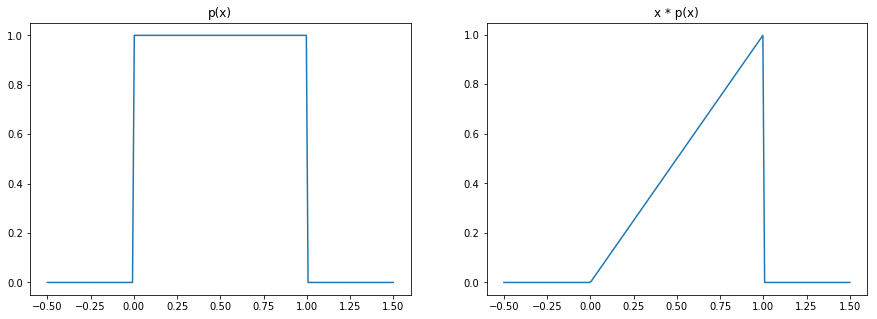

In [22]:
x = np.linspace(-.5, 1.5, 200)
y = np.logical_and(x >= 0, x <= 1)*1.0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(x, y)
ax1.set_title('p(x)')
ax2.plot(x, x*y)
ax2.set_title('x * p(x)')
plt.show()

Q5. Pentru densitatea de probabilitate f(x) dată mai sus, care este valoarea aşteptată pentru E(X)?

In [27]:
def q():
    return 1.000

print('Raspuns %s' % ('corect' if r(5, q()) else 'incorect'))

Raspuns corect



Q6. Mai jos este dată o populaţie de 6 numere, sub forma unui array Numpy. Funcţia Numpy mean() este folosită pentru a calcula media sa:

In [6]:
population = np.array([1, 4, 7, 10, 13, 19])
print('valoarea aşteptată (media):', np.mean(population))

valoarea aşteptată (media): 9.0


Mai departe, din această populaţie vom selecta, în mod aleator, un sample de trei valori. Vom face acest lucru de 1000 de ori (deci 1000 de sample-uri). Variabila $idx$ de mai jos descrie care din elementele populaţiei a fost selectat aleator - va fi o matrice de 1000 de linii x 3 coloane;

In [7]:
idx = np.random.randint(low=0, high=len(population), size=(1000, 3))

# vedem primele 5 linii ale ei:
print(idx[:5, :])

[[4 0 5]
 [2 1 3]
 [4 3 0]
 [1 4 4]
 [0 3 4]]


Folosind variabila $idx$, prin proiecţie pe populaţie, vom obţine cele 1000 de sample-uri (matricea rezultată are aceleaşi dimensiuni):

In [8]:
samples = population[idx]
print('forma matricii: %s (linii, coloane)' % str(samples.shape))

forma matricii: (1000, 3) (linii, coloane)


Pentru fiecare linie, calculăm media (observaţi argumentul axis; acesta indică axa pentru care se face funcţia, aici 1 înseamnă că se face pe linii; pe coloane ar fi fost axis=0):

In [9]:
means = np.mean(samples, axis=1)
means[:5]

array([11.,  7.,  8., 10.,  8.])

Sample mean pe care o tot socotim de 1000 de ori are şi ea o distribuţie. Media acestei distribuţii este un estimator pentru media populaţiei:

In [10]:

np.mean(means)

9.063

Pentru dimensiuni ale sample-ului de 2, 3, 4, ridicaţi distribuţia sample mean, folosind atât codul de mai sus cât şi cel prezentat la curs pentru aruncarea zarului - funcţia roll() şi graficul aferent.

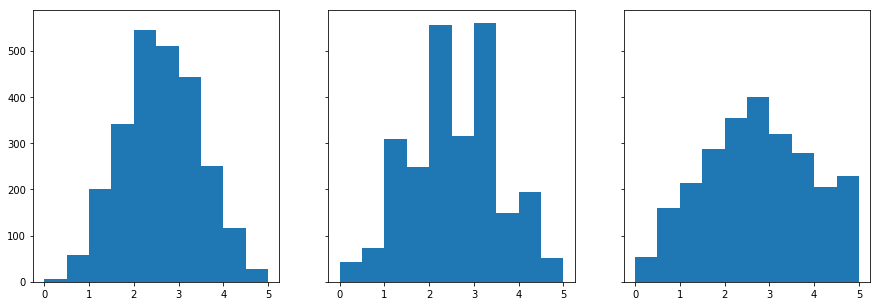

In [11]:
sample4=np.random.randint(low=0,high=len(population),size=(2500,4))
sample3=sample4[:,:-1]
sample2=sample3[:,:-1]


fig, (ax1,ax2,ax3) = plt.subplots (1, 3 ,sharey=True, figsize=(15,5))

ax1.hist(np.mean(sample4,axis=1))
ax2.hist(np.mean(sample3,axis=1))
ax3.hist(np.mean(sample2,axis=1))
plt.show()

Q7. Valoarea aşteptată este o proprietate a:

statisticii
variabilităţii
distribuţiei
matematicii

In [35]:
def q():
    return 3

print('Raspuns %s' % ('corect' if r(7, q()) else 'incorect'))

Raspuns corect


Q8. Media populaţiei este centrul de masă al:

distribuţiei
populaţiei
sample-ului
familiei

In [36]:
def q():
    return 2

print('Raspuns %s' % ('corect' if r(8, q()) else 'incorect'))

Raspuns corect



Q9. Sample mean este centrul de masă al:

datelor observate
familiei
populaţiei
distribuţiei

In [37]:
def q():
    return 1

print('Raspuns %s' % ('corect' if r(9, q()) else 'incorect'))

Raspuns corect


Q10. Media populaţiei estimează sample mean? (da/nu) Este sample mean unbiased? (da/nu) Pe măsură ce adăugăm mai multe experimente sample-ului, devine densitatea de probabilitate din ce în ce mai concentrată în jurul mediei populaţiei? (da/nu)

Daţi un răspuns de genul 'x/x/x', unde x este 'da' sau 'nu'.

In [38]:
def q():
    return 'nu/da/da'

print('Raspuns %s' % ('corect' if r(10, q()) else 'incorect'))

Raspuns corect


Q11. Fie o populaţie a aruncărilor cu zarul. Probabilitatea fiecărei feţe este $1/6$. Care este valoarea aşteptată a feţei care va ieşi (media)? Încercaţi să nu introduceţi valoarea direct ci să scrieţi cod numpy care o calculează.

In [39]:
x = np.array(range(1, 7))
print('Evenimente posibile:', x)

def q():
    return sum(x)/len(x)

print('Raspuns %s' % ('corect' if r(11, q()) else 'incorect'))

Evenimente posibile: [1 2 3 4 5 6]
Raspuns corect


Q12. Mai departe, care este valoarea aşteptată a pătratului variabilei aleatoare x de mai sus?

In [43]:
x = np.array(range(1, 7))
print('Evenimente posibile:', x)

def q():
    return sum(x**2)/len(x)

print('Raspuns %s' % ('corect' if r(12, np.round(q(), 3)) else 'incorect'))

Evenimente posibile: [1 2 3 4 5 6]
Raspuns corect


Q13. În continuare, care este valoarea dispersiei? Calculaţi-o ca diferenţa dintre valoarea aşteptată a pătratelor variabilei aleatoare X şi pătratul mediei sale:

In [44]:
x = np.array(range(1, 7))
print('Evenimente posibile:', x)

def q():
    return (sum(x**2)/len(x))-(sum(x)/len(x))**2

print('Raspuns %s' % ('corect' if r(13, np.round(q(), 3)) else 'incorect'))

Evenimente posibile: [1 2 3 4 5 6]
Raspuns corect


Q14. Considerăm dispersia mediei sample-urilor pentru o variabilă aleatoare, adică $Var(\bar{X})$. Presupunem $n$ variabile independente $X_i$. Care din următoarele este expresia lui $Var(\bar{X})$?

1)$Var(1/n * \sum_i X_i)$
2)$E(1/n * \sum_i X_i)$
3)$sigma$
4)$\mu$

In [45]:

def q():
    return 1

print('Raspuns %s' % ('corect' if r(14, q()) else 'incorect'))

Raspuns corect


Q15. Cu care din următoarele este egală $Var(1/n * \sum_i X_i)$ ? Folosiţi proprietatea de liniaritate a dispersiei.

1)$1/n^2 * E(\sum_i X_i)$
2)$\mu / n^2$
3)$1/n^2 * Var(\sum_i X_i)$
4)$\sigma / n$

In [49]:
def q():
    return 3

print('Raspuns %s' % ('corect' if r(15, q()) else 'incorect'))

Raspuns corect


Q16. Mai departe, cu ce este egală $Var(\sum_i X_i)$? Atenţie, variabilele aleatoare $X_i$ sunt independente.

1)$\sum_i Var(X_i)$
2)$E(\sum_i X_i)$
3)$Var(\sigma)$
4)$E(\mu)$

In [51]:
def q():
    return 1

print('Raspuns %s' % ('corect' if r(16, q()) else 'incorect'))

Raspuns corect



Q17. Mai departe, fiecare $X_i$ provine dintr-o populaţie cu dispersie $\sigma^2$. Cu ce este egală $\sum_i Var(X_i)$ ?

1)$n^2 * Var(\sigma)$
2)$n * E(\mu)$
3)$n * \mu$
4)$n * \sigma^2$

In [52]:
def q():
    return 4

print('Raspuns %s' % ('corect' if r(17, q()) else 'incorect'))

Raspuns corect


Q18. În cele ce urmează ne propunem să verificăm modul de calcul teoretic al standard error. Ne reamintim cum funcţionează aceasta pentru evenimentele reprezentînd aruncarea monezii:

In [57]:
# Pentru o moneda cu probabilitatea p sa iasa Head, avem:
# * media este p
# * dispersia (variance) este p*(1-p), sau p*p daca moneda este ideala
#   in acest ultim caz, deviatia standard este tot p

# generam o matrice de 10000 x 10 de aruncari fair, valori intre 0 si 1
nosim, n = 10000, 10
x = np.random.randint(low=0, high=2, size=(nosim, n))

# fiecare sample consta din 10 aruncari; calculam media acestor 10 aruncari
x = np.mean(x, axis=1)

# calculam deviaţia standard a mediei (radical din standard error) teoretic
print(0.5/np.sqrt(n))

# calculam deviaţia standard folosind numpy
print(np.std(x))

# calculati deviatia standard de mana, pornind de la sample-ul x, scriind explicit formula:
def stddev(x):
    return np.sqrt(np.mean(np.abs(x-np.mean(x))**2))

print('Raspuns %s' % ('corect' if stddev(x) == np.std(x) else 'incorect'))

0.15811388300841897
0.15825217218098458
Raspuns corect


Q19. Realizaţi acelaşi calcul, de data aceasta pentru evenimentele aruncării cu zarul:

Notă: cam 1/10 din cazuri o să primiţi 'răspuns incorect', chiar dacă rezolvarea e bună

In [60]:
x = np.array([1, 2, 3, 4, 5, 6])
mu = np.mean(x)
sigma = np.var(x)
print(mu, sigma)

nosim, n = 10000, 10
x = np.random.randint(low=0, high=7, size=(nosim, n))
x = np.mean(x, axis=1)

# calculati standard error of the mean
def stderror(sigma, n):
    return np.std(x)

print(np.std(x))
print(stderror(sigma, n))

print('Raspuns %s' % ('corect' if np.round(stderror(x, n), 2) == np.round(np.std(x), 2) else 'incorect'))

3.5 2.9166666666666665
0.6251254389320594
0.6251254389320594
Raspuns corect


Q20. a) Pentru o distribuţie normală de medie 10 şi dispersie 2, consideraţi un număr variabil de sample size-uri pe care le extrageţi din distribuţie: 10, 20, 40, 60 de sample-uri. Calculaţi media pe sample. Repetaţie de 10000 de ori. Ridicaţi histogramele distribuţiei mediei sample-ului (sample mean).

b) Realizaţi acelaşi lucru şi pentru distribuţia dispersiei (variance).

Observaţi valorile unde se centrează distribuţiile obţinute.

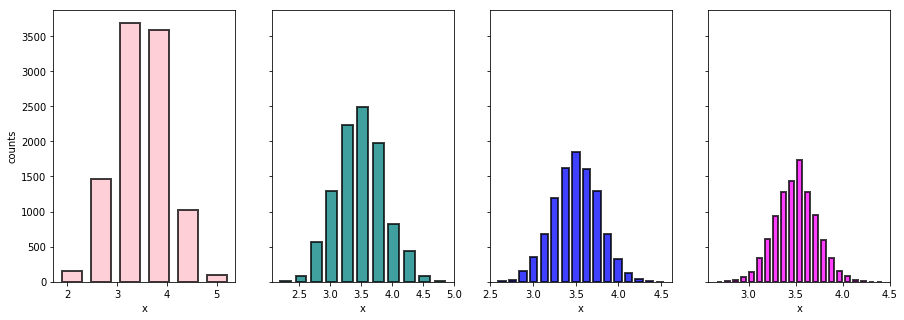

In [65]:
def roll(n):
    # construim o matrice de n x 10000 de valori aleatoare cuprinse intre 1 si 6
    r = np.random.randint(1, high=7, size=(10000, n))
    
    # se face media doar pe axa 1, adica pe linii, rezultatul va fi o matrice
    # de n x 1 in care fiecare element va fi media (aritmetica) a liniei anterioare
    return np.average(r, axis=1)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 5))
kwargs = dict(rwidth=0.7, density=False, alpha=0.75, ec='k', linewidth=2)
# schimbati scala cu density=True ca sa vedeti cum se reduce imprastierea mediei
# si cum se 'ascute' gaussiana
#
# density=True schimba ordonata din valori count in valori relative, adica probabilitati,
# deci considera ca toata histograma este o Probability Mass Function (si o reprezinta ca atare)
#
ax1.hist(roll(10), 6, **kwargs, facecolor='pink')
[ax_.set_xlabel('x') for ax_ in [ax1, ax2, ax3, ax4]]
ax1.set_ylabel('counts')
ax2.hist(roll(20), 11, **kwargs, facecolor='teal')
ax3.hist(roll(40), 16, **kwargs, facecolor='blue')
ax4.hist(roll(60), 21, **kwargs, facecolor='magenta')
plt.show()